In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

In [2]:
book=pd.read_csv("C:/Users/Yogendra/Downloads/book.csv")
book.head()

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0


In [3]:
book.duplicated().sum()

1680

In [ ]:
#Though we have duplicate entries, we do not remove them because this is transaction data. 

In [4]:
# sorting movies popularity wise
list = book.sum()
list= list.sort_values(ascending=False)
list

CookBks      862
ChildBks     846
DoItYBks     564
GeogBks      552
YouthBks     495
ArtBks       482
RefBks       429
ItalCook     227
Florence     217
ItalArt       97
ItalAtlas     74
dtype: int64

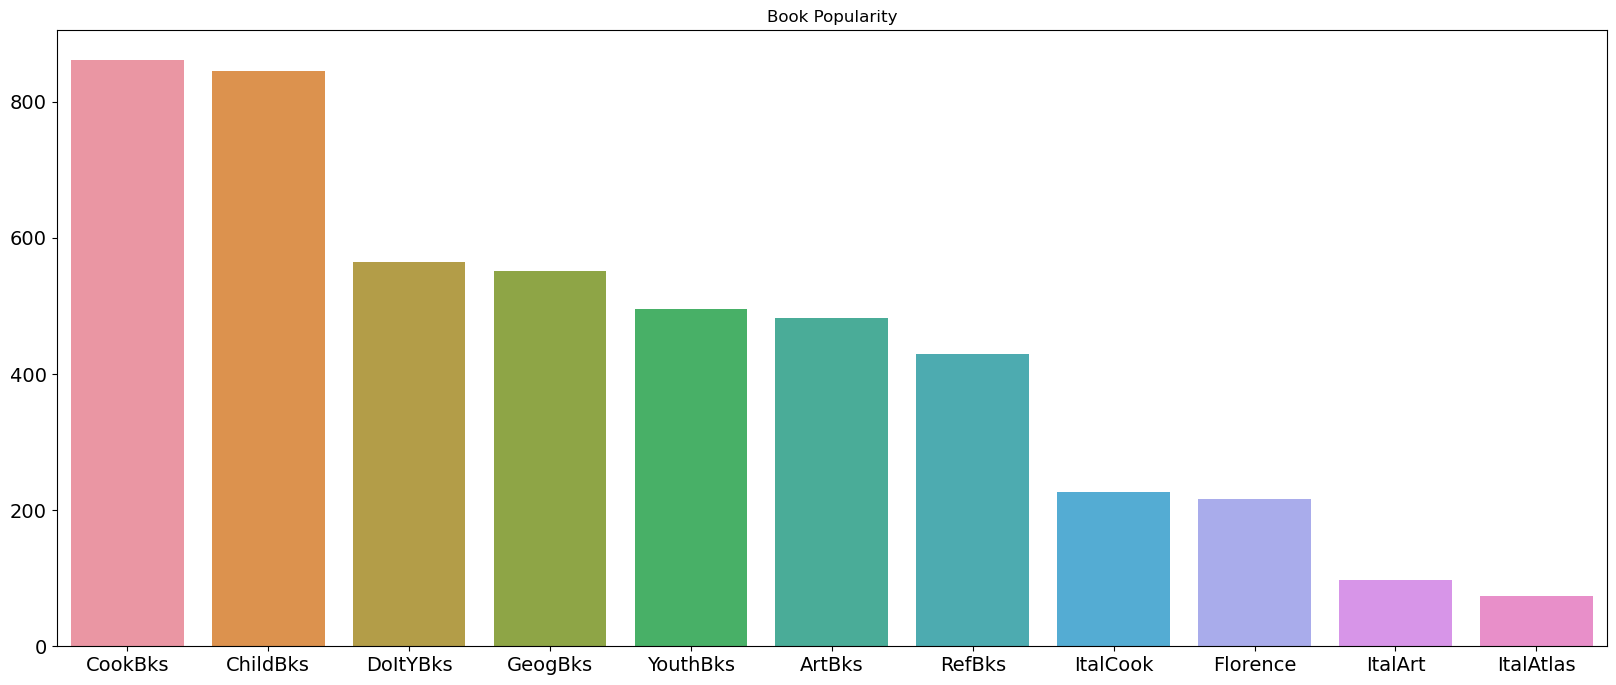

In [6]:
plt.figure(figsize=(20,8))
sns.barplot(x= list.index, y=list.values, order=list.index )
plt.title('Book Popularity')
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.show()

In [8]:
#Getting Association rules with 10% Support and 30% confidence
freq10 = apriori(book, min_support=0.1, use_colnames=True)
freq10

C:\Users\Yogendra\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
5,0.2410,(ArtBks)
6,0.2760,(GeogBks)
7,0.1135,(ItalCook)
8,0.1085,(Florence)
9,0.1650,"(YouthBks, ChildBks)"


In [9]:
rules30 = association_rules(freq10, metric='confidence', min_threshold=0.3)
rules30

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000,0.485714
1,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750,0.633449
2,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069,0.505870
3,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240,0.498856
4,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347,0.489842
...,...,...,...,...,...,...,...,...,...,...
84,"(CookBks, GeogBks)",(ArtBks),0.1925,0.2410,0.1035,0.537662,2.230964,0.057107,1.641657,0.683298
85,"(ArtBks, GeogBks)",(CookBks),0.1275,0.4310,0.1035,0.811765,1.883445,0.048547,3.022812,0.537602
86,"(CookBks, ArtBks)",(GeogBks),0.1670,0.2760,0.1035,0.619760,2.245509,0.057408,1.904063,0.665866
87,(GeogBks),"(CookBks, ArtBks)",0.2760,0.1670,0.1035,0.375000,2.245509,0.057408,1.332800,0.766114


In [10]:
rules30.sort_values('lift', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
28,(ItalCook),(CookBks),0.1135,0.4310,0.1135,1.000000,2.320186,0.064582,inf,0.641850
71,"(ArtBks, ChildBks)",(GeogBks),0.1625,0.2760,0.1020,0.627692,2.274247,0.057150,1.944628,0.669008
72,(GeogBks),"(ArtBks, ChildBks)",0.2760,0.1625,0.1020,0.369565,2.274247,0.057150,1.328448,0.773887
78,(ArtBks),"(CookBks, DoItYBks)",0.2410,0.1875,0.1015,0.421162,2.246196,0.056313,1.403674,0.730966
74,"(CookBks, DoItYBks)",(ArtBks),0.1875,0.2410,0.1015,0.541333,2.246196,0.056313,1.654797,0.682834
...,...,...,...,...,...,...,...,...,...,...
4,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347,0.489842
12,(YouthBks),(CookBks),0.2475,0.4310,0.1620,0.654545,1.518667,0.055328,1.647105,0.453858
13,(CookBks),(YouthBks),0.4310,0.2475,0.1620,0.375870,1.518667,0.055328,1.205678,0.600225
3,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240,0.498856


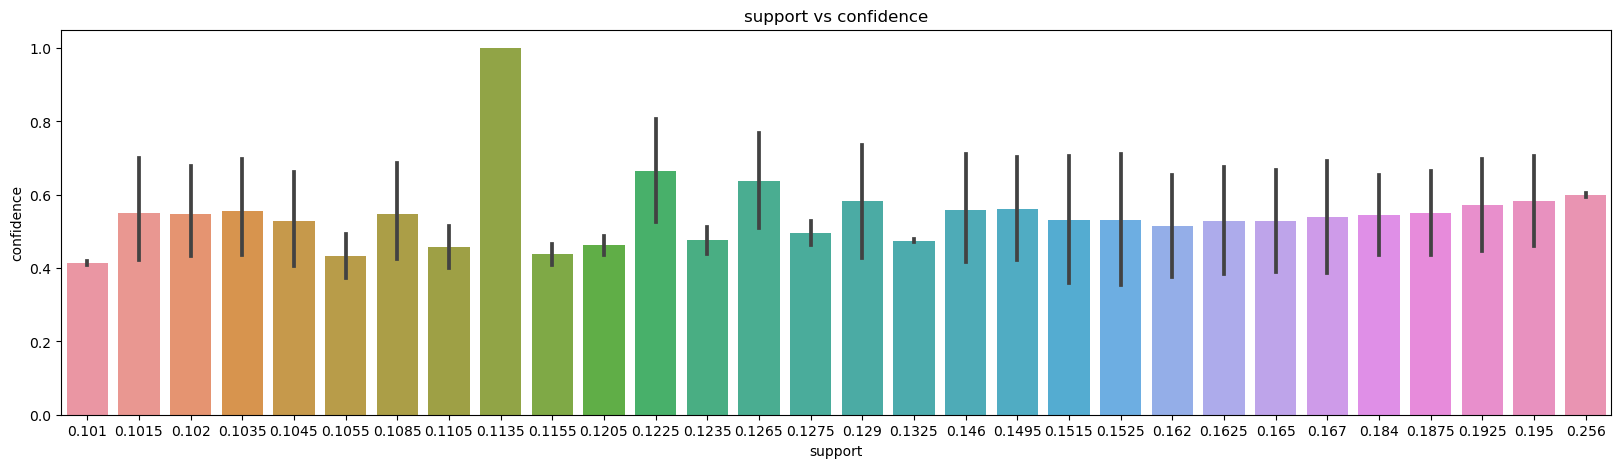

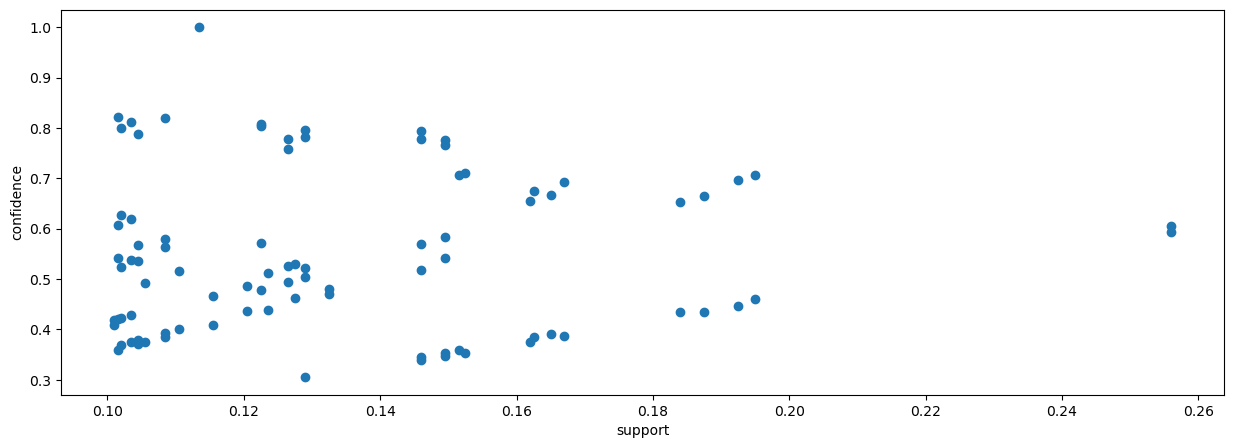

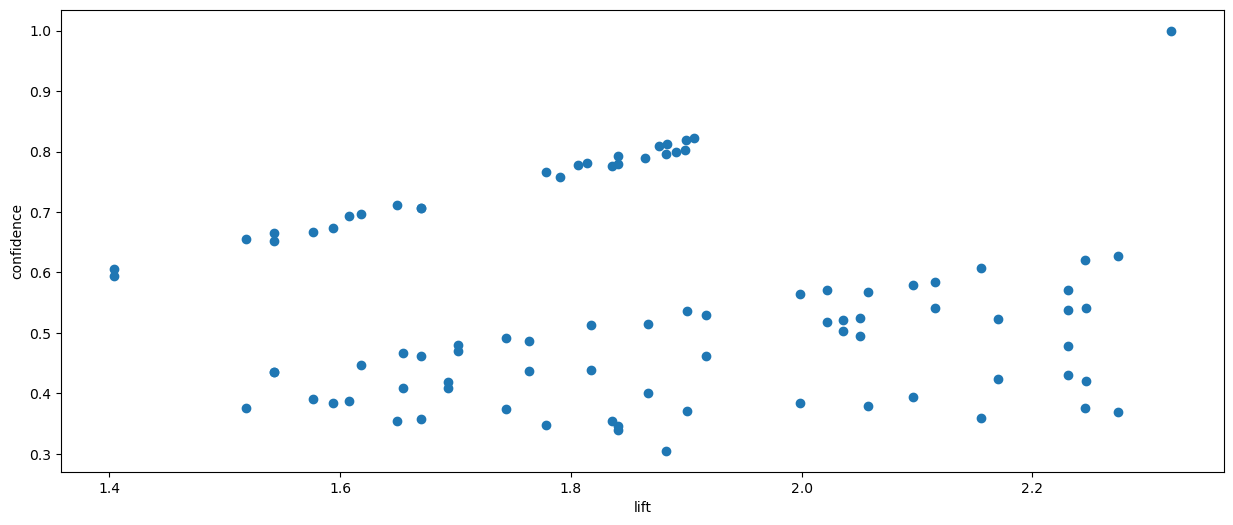

In [12]:
plt.figure(figsize=(20,5))
sns.barplot(rules30,x="support",y="confidence")
plt.title("support vs confidence")
plt.show()

plt.figure(figsize=(15,5))
plt.scatter(rules30['support'],rules30['confidence'])
plt.xlabel('support')
plt.ylabel('confidence') 
plt.show()

plt.figure(figsize=(15,6))
plt.scatter(rules30['lift'],rules30['confidence'])
plt.xlabel('lift')
plt.ylabel('confidence') 
plt.show()

<Axes: xlabel='consequents', ylabel='antecedents'>

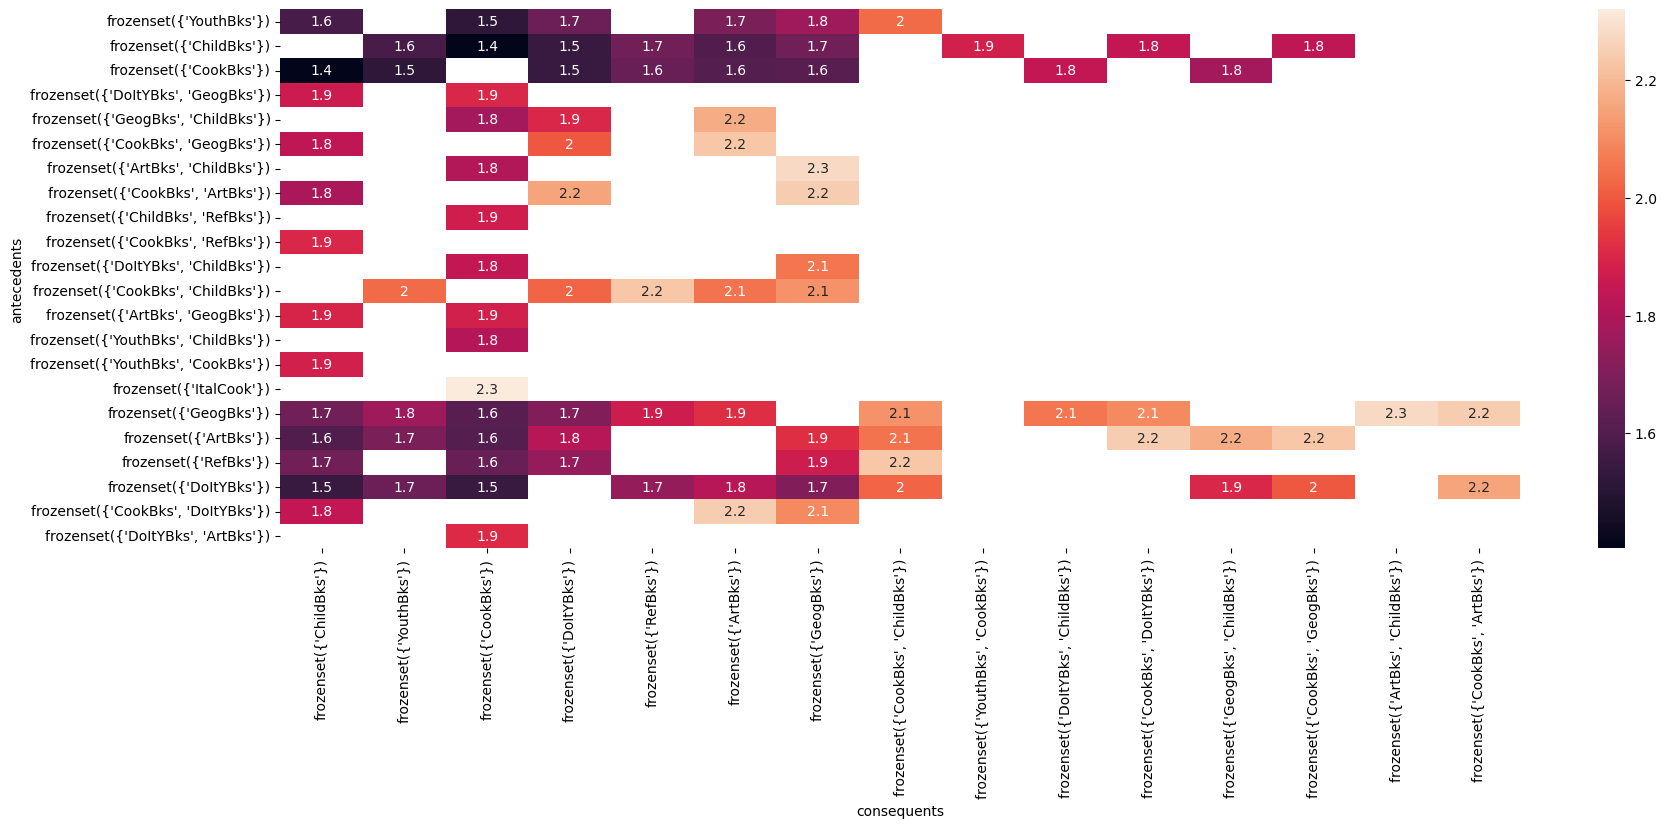

In [14]:
piv1 = rules30.pivot('antecedents','consequents','lift')
plt.figure(figsize=(20,7))
sns.heatmap(piv1,annot=True)

In [ ]:
#Association rules with 20% Support and 40% confidence

In [15]:
freq20 = apriori(book, min_support=0.2, use_colnames=True)
freq20

C:\Users\Yogendra\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
5,0.2410,(ArtBks)
6,0.2760,(GeogBks)
7,0.2560,"(CookBks, ChildBks)"


In [16]:
rules40 = association_rules(freq20, metric='confidence', min_threshold=0.4)
rules40

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(CookBks),(ChildBks),0.431,0.423,0.256,0.593968,1.404179,0.073687,1.421069,0.505870
1,(ChildBks),(CookBks),0.423,0.431,0.256,0.605201,1.404179,0.073687,1.441240,0.498856


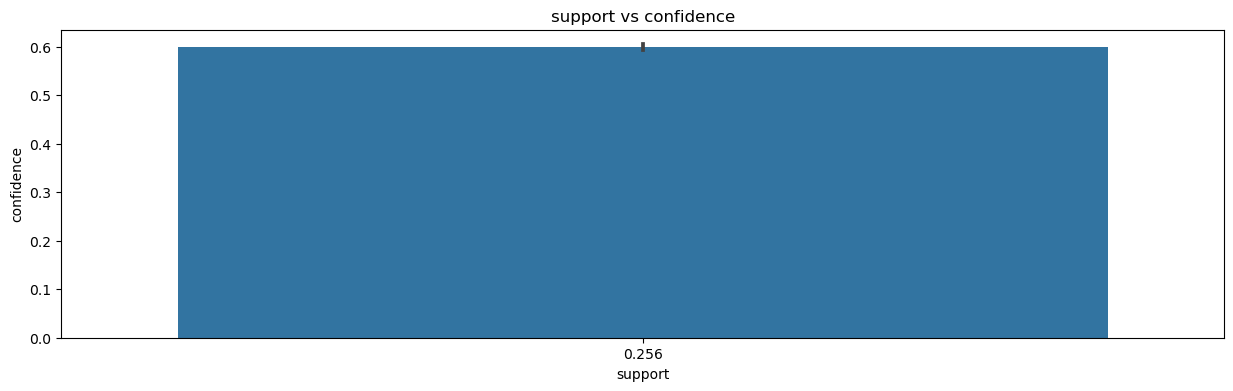

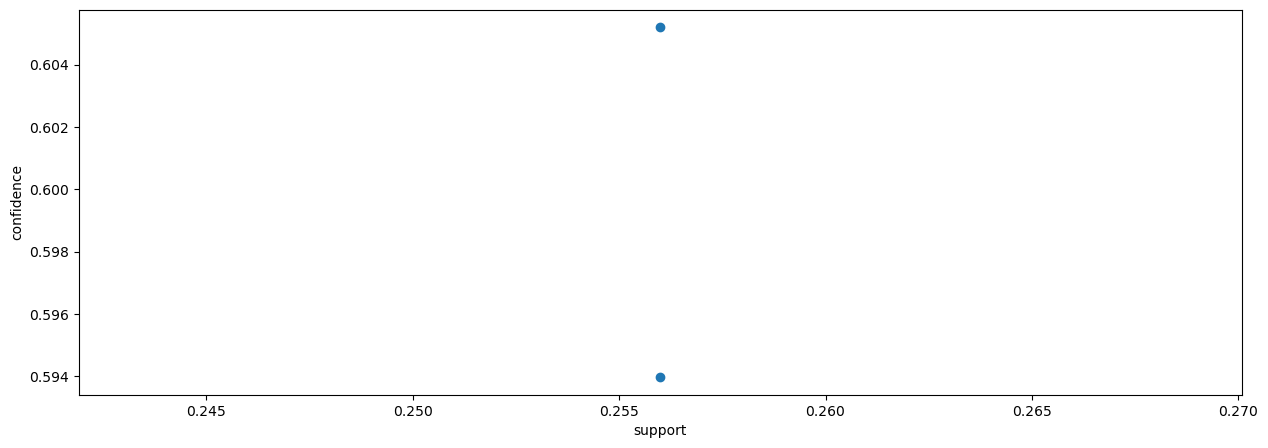

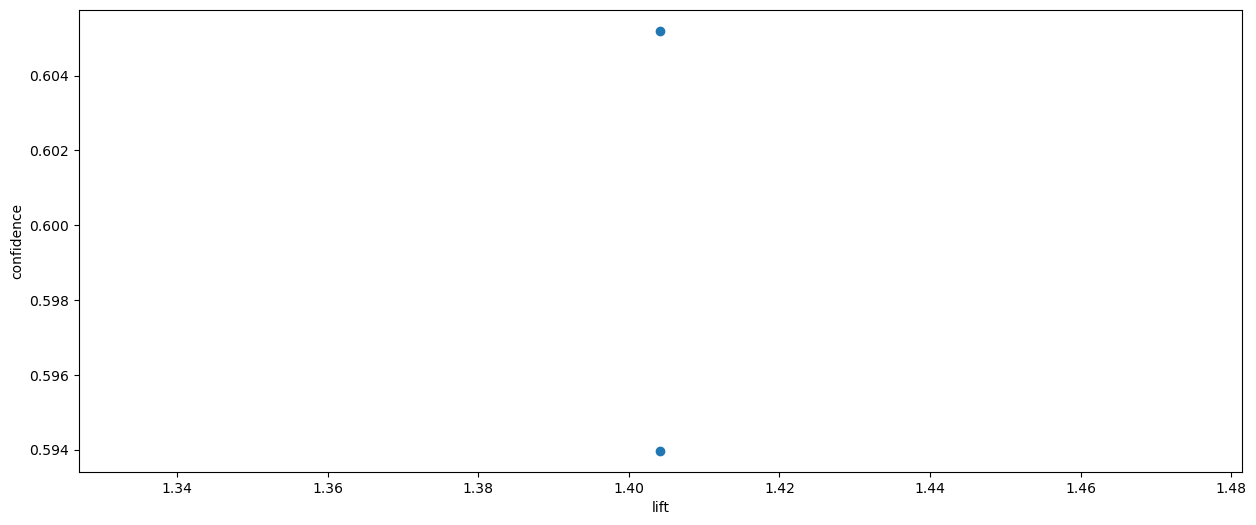

In [18]:
plt.figure(figsize=(15,4))
sns.barplot(rules40,x="support",y="confidence")
plt.title("support vs confidence")
plt.show()

plt.figure(figsize=(15,5))
plt.scatter(rules40['support'],rules40['confidence'])
plt.xlabel('support')
plt.ylabel('confidence') 
plt.show()

plt.figure(figsize=(15,6))
plt.scatter(rules40['lift'],rules40['confidence'])
plt.xlabel('lift')
plt.ylabel('confidence') 
plt.show()

<Axes: xlabel='consequents', ylabel='antecedents'>

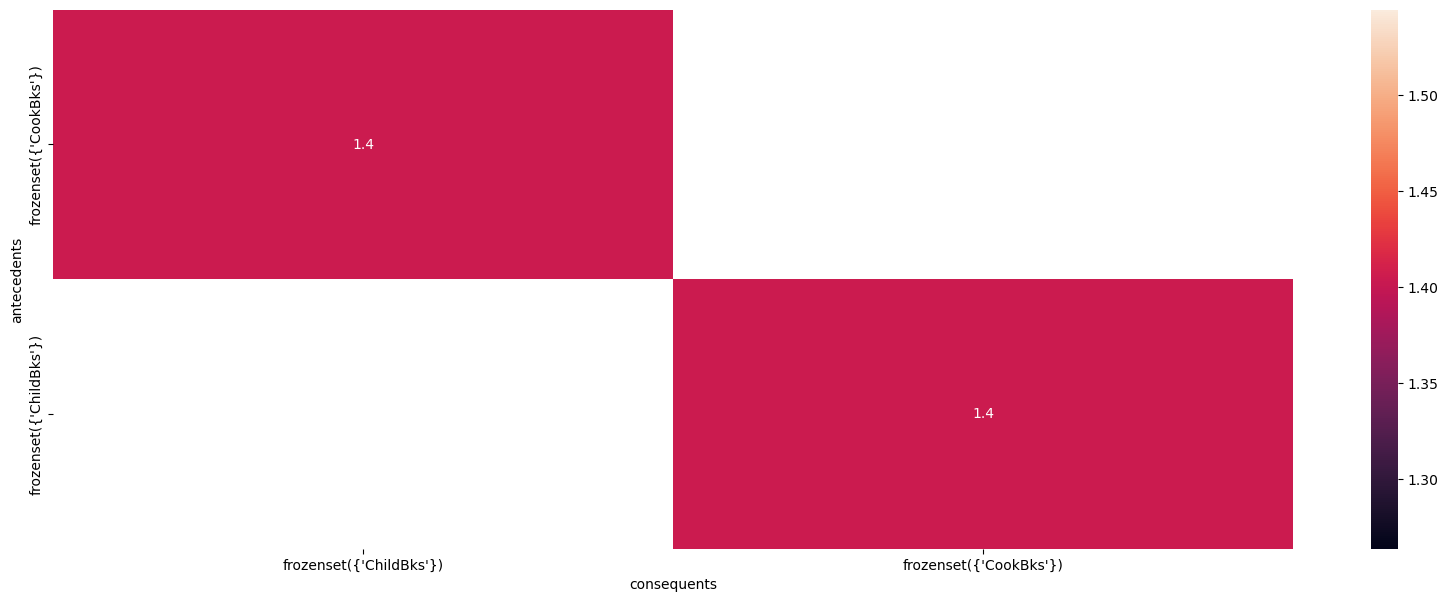

In [19]:
piv40 = rules40.pivot('antecedents','consequents','lift')
plt.figure(figsize=(20,7))
sns.heatmap(piv40,annot=True)

In [20]:
#Association rules with 10% Support and 40% confidence

In [21]:
rules40new = association_rules(freq10, metric='confidence', min_threshold=0.4)
rules40new

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000,0.485714
1,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069,0.505870
2,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240,0.498856
3,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347,0.489842
4,(ChildBks),(DoItYBks),0.4230,0.2820,0.1840,0.434988,1.542511,0.064714,1.270770,0.609543
...,...,...,...,...,...,...,...,...,...,...
65,"(DoItYBks, GeogBks)",(CookBks),0.1325,0.4310,0.1085,0.818868,1.899926,0.051392,3.141354,0.546010
66,"(CookBks, GeogBks)",(ArtBks),0.1925,0.2410,0.1035,0.537662,2.230964,0.057107,1.641657,0.683298
67,"(ArtBks, GeogBks)",(CookBks),0.1275,0.4310,0.1035,0.811765,1.883445,0.048547,3.022812,0.537602
68,"(CookBks, ArtBks)",(GeogBks),0.1670,0.2760,0.1035,0.619760,2.245509,0.057408,1.904063,0.665866


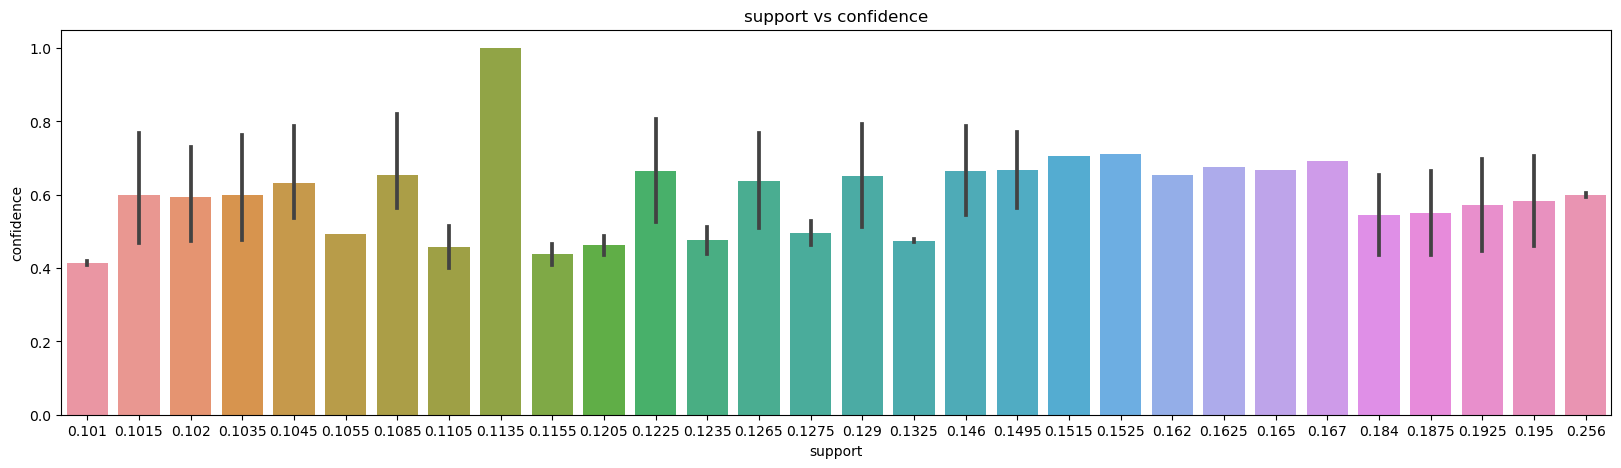

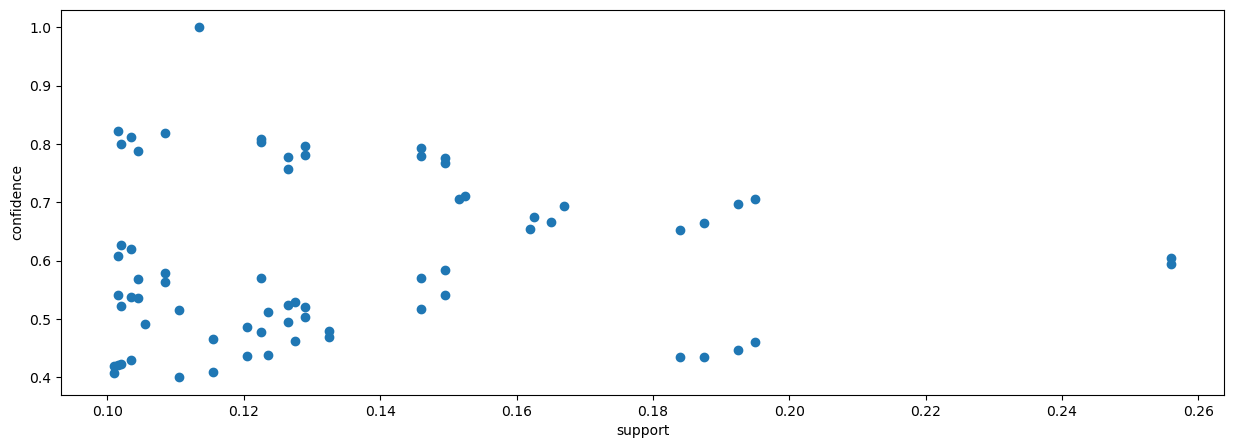

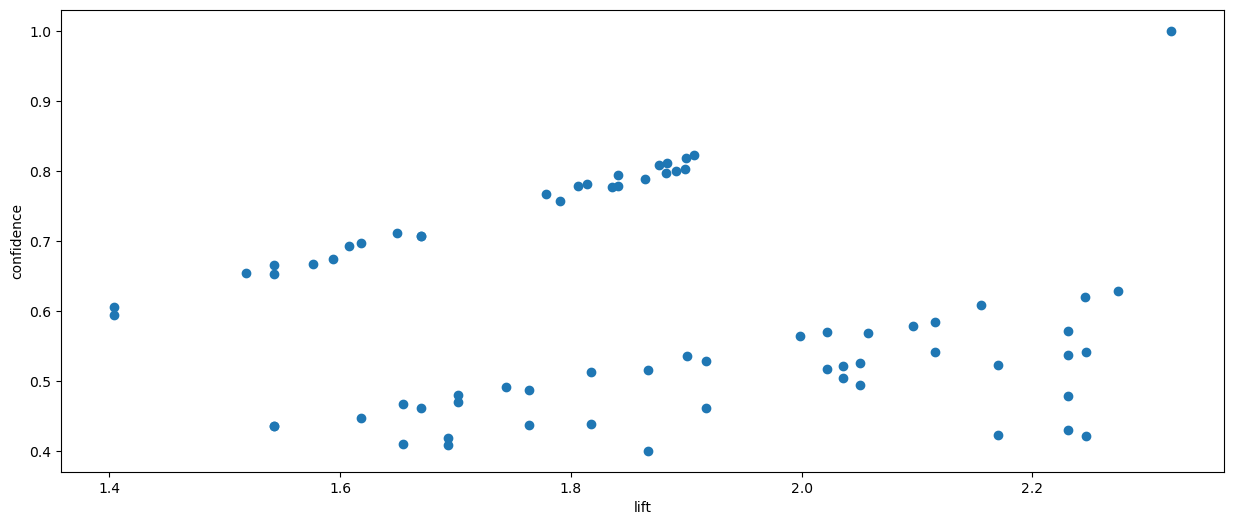

In [23]:
plt.figure(figsize=(20,5))
sns.barplot(rules40new,x="support",y="confidence")
plt.title("support vs confidence")
plt.show()

plt.figure(figsize=(15,5))
plt.scatter(rules40new['support'],rules40new['confidence'])
plt.xlabel('support')
plt.ylabel('confidence') 
plt.show()

plt.figure(figsize=(15,6))
plt.scatter(rules40new['lift'],rules40new['confidence'])
plt.xlabel('lift')
plt.ylabel('confidence') 
plt.show()

<Axes: xlabel='consequents', ylabel='antecedents'>

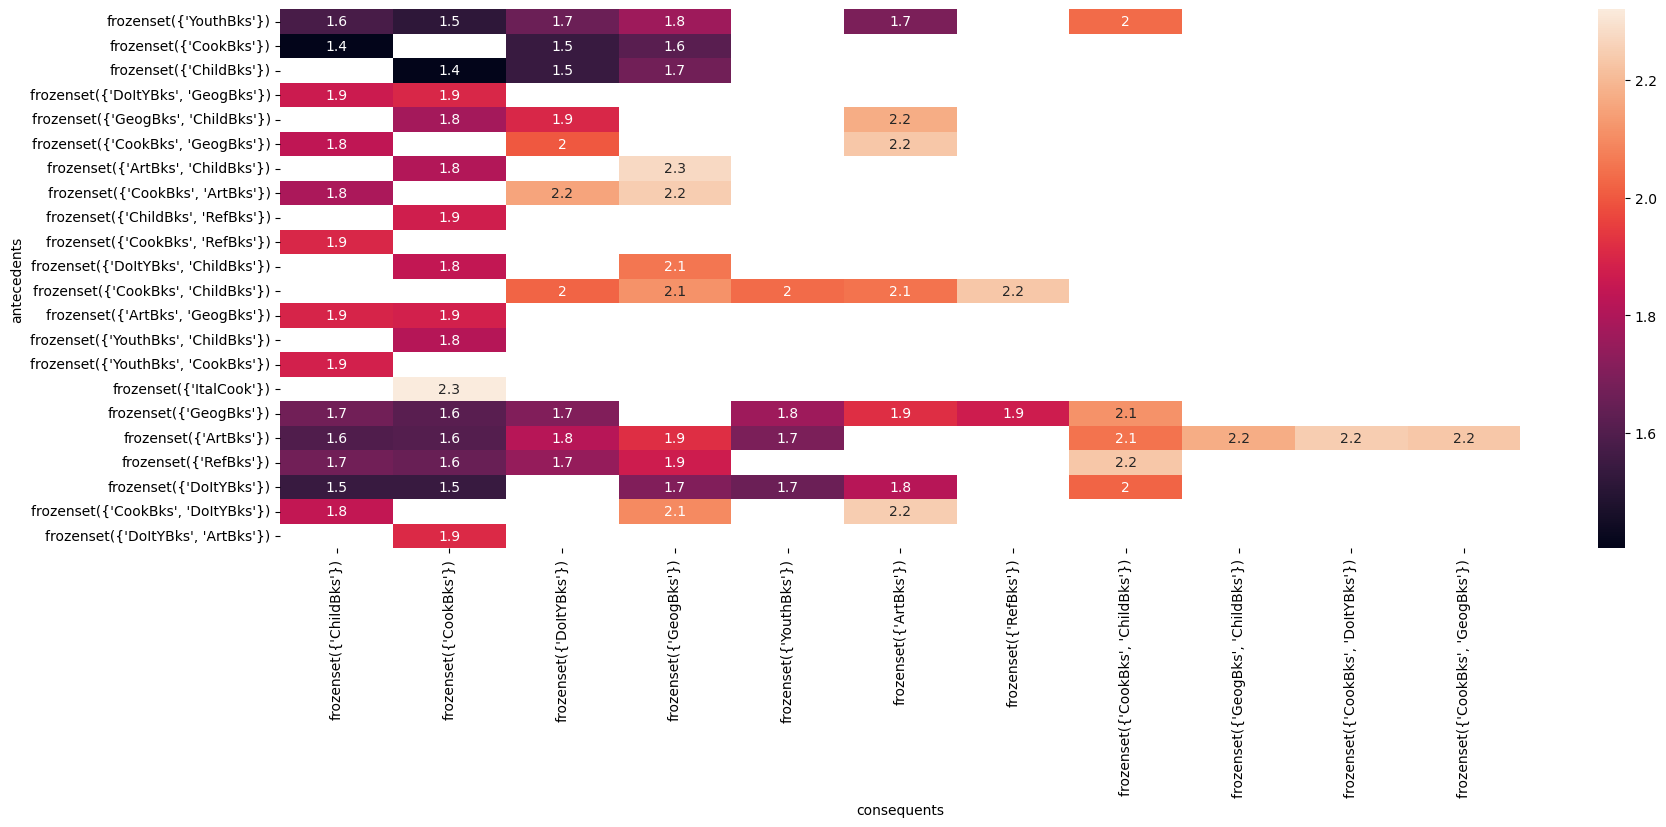

In [24]:
piv40new = rules40new.pivot('antecedents','consequents','lift')
plt.figure(figsize=(20,7))
sns.heatmap(piv40new,annot=True)

In [ ]:
#Association rules with 10% Support and 30% confidence then no. of rules 89
##Association rules with 10% Support and 40% confidence then no. of rules 70
#Association rules with 20% Support and 40% confidence then no. of rules 2 
#As the support and confidence threshold increases, no of rules decreases.